'Regresión Lineal'

In [15]:
# 1. Cargar las librerías necesarias
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from sklearn.linear_model import Lasso
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.model_selection import train_test_split

In [2]:
# 2. Cargar el conjunto de datos
df = pd.read_csv('data.csv')

In [3]:
# 3. Realizar una inspección inicial del conjunto de datos
print(df.head())
print(df.info())
print(df.describe())

  Car_Name  Year  Selling_Price  Present_Price  Kms_Driven Fuel_Type  \
0     ritz  2014           3.35           5.59       27000    Petrol   
1      sx4  2013           4.75           9.54       43000    Diesel   
2     ciaz  2017           7.25           9.85        6900    Petrol   
3  wagon r  2011           2.85           4.15        5200    Petrol   
4    swift  2014           4.60           6.87       42450    Diesel   

  Seller_Type Transmission  Owner  
0      Dealer       Manual      0  
1      Dealer       Manual      0  
2      Dealer       Manual      0  
3      Dealer       Manual      0  
4      Dealer       Manual      0  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Car_Name       301 non-null    object 
 1   Year           301 non-null    int64  
 2   Selling_Price  301 non-null    float64
 3   Present_Price  301 non

In [4]:
# 4. Limpiar los datos (si es necesario)
# Buscar valores nulos
print(df.isnull().sum())

Car_Name         0
Year             0
Selling_Price    0
Present_Price    0
Kms_Driven       0
Fuel_Type        0
Seller_Type      0
Transmission     0
Owner            0
dtype: int64


In [11]:
# Separar las características (X) y la variable objetivo (y)
X = df.drop(columns=['Selling_Price'])
y = df['Selling_Price']

# Codificación de variables categóricas
X = pd.get_dummies(X, drop_first=True)

# División de los datos en conjunto de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [ ]:
#Crear y ajustar el modelo de regresión lineal
modelo=LinearRegression()
modelo.fit(X,Y)

In [12]:
# Codificación de variables categóricas
X = pd.get_dummies(X, drop_first=True)

# División de los datos en conjunto de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [17]:
# Definir el modelo de Lasso
lasso = Lasso()

# Definir la búsqueda de hiperparámetros
param_grid = {
    'alpha': [0.01, 0.1, 1, 10, 100]
}

In [23]:
from sklearn.linear_model import Lasso
from sklearn.model_selection import GridSearchCV

# Definir el modelo de Lasso
lasso = Lasso()

# Definir la búsqueda de hiperparámetros
param_grid = {
    'alpha': [0.01, 0.1, 1, 10, 100]
}

In [24]:
# Realizar la búsqueda de hiperparámetros usando GridSearchCV
grid_search = GridSearchCV(estimator=lasso, param_grid=param_grid, cv=5, scoring='neg_mean_squared_error')
grid_search.fit(X_train, y_train)

# Mejor modelo
best_model = grid_search.best_estimator_

print("Mejor hiperparámetro:", grid_search.best_params_)

Mejor hiperparámetro: {'alpha': 0.1}


In [25]:
from sklearn.linear_model import Lasso
from sklearn.model_selection import GridSearchCV

# Definir el modelo de Lasso
lasso = Lasso()

# Definir la búsqueda de hiperparámetros
param_grid = {
    'alpha': [0.01, 0.1, 1, 10, 100]
}

# Realizar la búsqueda de hiperparámetros usando GridSearchCV
grid_search = GridSearchCV(estimator=lasso, param_grid=param_grid, cv=5, scoring='neg_mean_squared_error')
grid_search.fit(X_train, y_train)

# Mejor modelo
best_model = grid_search.best_estimator_

print("Mejor hiperparámetro:", grid_search.best_params_)

Mejor hiperparámetro: {'alpha': 0.1}


In [26]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Predicciones en el conjunto de prueba
y_pred = best_model.predict(X_test)

# Calcular métricas de desempeño
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"MAE: {mae}")
print(f"MSE: {mse}")
print(f"R^2: {r2}")

MAE: 1.0495286097323002
MSE: 2.418322102965067
R^2: 0.9043283765941561


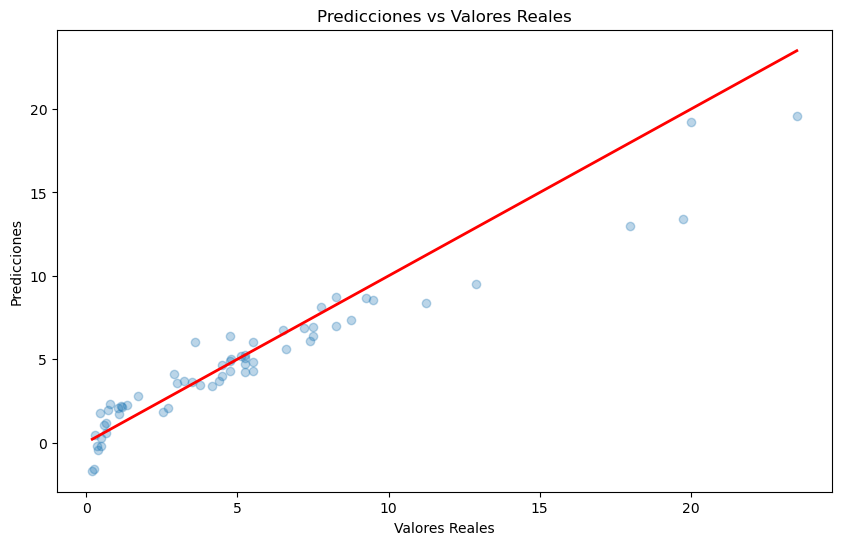

C:\Users\Yuliana Martinez\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


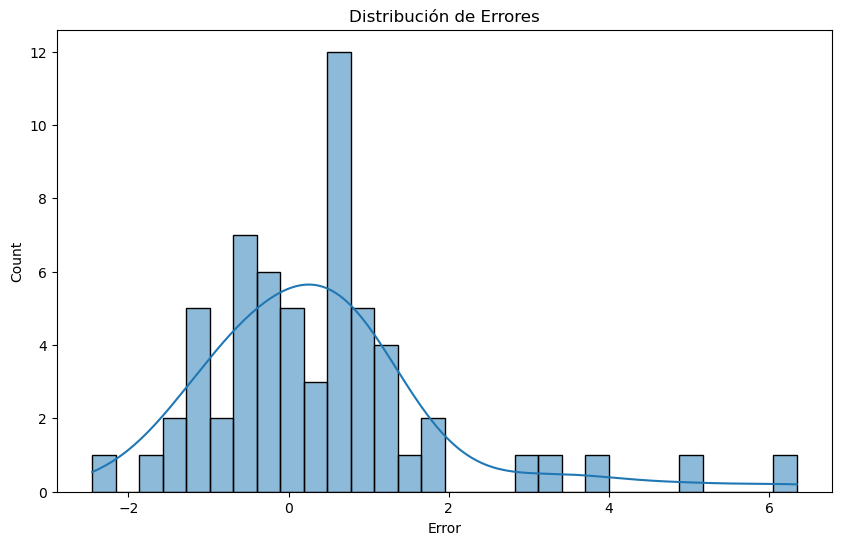

In [27]:
import matplotlib.pyplot as plt
import seaborn as sns

# Gráfico de predicciones vs valores reales
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.3)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linewidth=2)
plt.xlabel('Valores Reales')
plt.ylabel('Predicciones')
plt.title('Predicciones vs Valores Reales')
plt.show()

# Histograma de errores
errors = y_test - y_pred
plt.figure(figsize=(10, 6))
sns.histplot(errors, bins=30, kde=True)
plt.xlabel('Error')
plt.title('Distribución de Errores')
plt.show()